In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=CHINEDUEZEADI10\MSSQLSERVER01;'
                      'Database=BankCredit;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

In [5]:
query = '''select g.client_id, a.account_id,b.trans_id, a.district_id, c.order_id, d.loan_id, 
(select max(date) from [dbo].[trans]) 'max_trnx_date',
a.frequency as 'statement_freq', a.date as 'acct_open_date', b.amount as 'trnx_amount', b.balance, 
b.date as 'trnx_date', b.type as 'trnx_type', 
c.account_to, c.amount as 'order_amount', c.bank_to, c.k_symbol as 'order_ksymbol',
d.amount as 'loan_amount', d.date as 'loan_date', d.duration as 'loan_duration', 
d.payments as 'loan_payments', d.status as 'loan_status',
e.*, f.disp_id, f.type as 'disp_type', g.birth_number, 
h.card_id, h.type as 'card_type', h.issued as 'card_issued'
from [dbo].[account] a
left join [dbo].[trans] b
on a.account_id=b.account_id
left join [dbo].[order] c
on a.account_id=c.account_id
right join [dbo].[loan] d
on a.account_id=d.account_id
right join [dbo].[district] e
on a.district_id=e.A1
left join [dbo].[disp] f
on a.account_id=f.account_id
left join [dbo].[client] g
on f.client_id=g.client_id
inner join [dbo].[card] h
on f.disp_id=h.disp_id;
'''

In [6]:
df = pd.read_sql(query,conn)
df.tail(100)

,client_id,account_id,trans_id,district_id,order_id,loan_id,max_trnx_date,statement_freq,acct_open_date,trnx_amount,...,A13,A14,A15,A16,disp_id,disp_type,birth_number,card_id,card_type,card_issued
104804,11497,9337,3682704,30,43228,6903,1998-12-31,POPLATEK MESICNE,930913,16.9,...,3.67,100,2985,2804,11189,OWNER,595717,1103,classic,951104 00:00:00
104805,11497,9337,3682705,30,43228,6903,1998-12-31,POPLATEK MESICNE,930913,2.4,...,3.67,100,2985,2804,11189,OWNER,595717,1103,classic,951104 00:00:00
104806,11497,9337,3682706,30,43228,6903,1998-12-31,POPLATEK MESICNE,930913,28.2,...,3.67,100,2985,2804,11189,OWNER,595717,1103,classic,951104 00:00:00
104807,11497,9337,3682707,30,43228,6903,1998-12-31,POPLATEK MESICNE,930913,1.9,...,3.67,100,2985,2804,11189,OWNER,595717,1103,classic,951104 00:00:00
104808,11497,9337,3682708,30,43228,6903,1998-12-31,POPLATEK MESICNE,930913,54.5,...,3.67,100,2985,2804,11189,OWNER,595717,1103,classic,951104 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104899,12079,9814,3682835,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,295.4,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104900,12079,9814,3682836,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,398.9,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104901,12079,9814,3682837,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,439.3,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104902,12079,9814,3682838,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,445.9,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00


In [7]:
df.shape

(104904, 44)

### Exploratory Data Analysis

In [8]:
df.describe()

,account_id,trans_id,order_id,loan_id,acct_open_date,trnx_amount,balance,account_to,order_amount,loan_amount,...,loan_duration,loan_payments,A4,A10,A11,A13,A14,A16,birth_number,card_id
count,104904.000000,1.049040e+05,104904.000000,104904.000000,104904.000000,104904.000000,104904.000000,1.049040e+05,104904.000000,104904.000000,...,104904.000000,104904.000000,1.049040e+05,104904.000000,104904.000000,104904.000000,104904.000000,104904.000000,104904.000000,104904.000000
mean,6019.440117,2.048071e+06,38317.463357,6214.003737,946735.114352,9004.156235,53272.867359,5.082666e+07,4161.833874,137327.798101,...,33.864905,4275.480859,2.815466e+05,69.322133,9617.711622,3.717485,121.146372,17319.826947,599992.196313,812.490858
std,3300.811270,1.121282e+06,4909.554211,686.329786,13920.696331,12631.543042,24082.594920,2.786919e+07,2892.198423,103075.897103,...,17.886866,2239.771912,3.674266e+05,21.566983,1337.481725,2.386259,24.312819,32122.823628,136346.992548,332.203462
min,97.000000,2.988600e+04,29559.000000,4986.000000,930125.000000,0.000000,-6830.600000,3.990000e+02,2.000000,12540.000000,...,12.000000,312.000000,4.282100e+04,33.900000,8173.000000,0.430000,81.000000,888.000000,351003.000000,16.000000
25%,3050.000000,9.473640e+05,33915.000000,5595.000000,930824.000000,251.300000,35986.850000,2.690371e+07,1682.000000,57120.000000,...,12.000000,2567.000000,8.888400e+04,52.000000,8561.000000,1.850000,104.000000,2252.000000,490414.000000,577.000000
50%,5952.000000,2.042638e+06,38199.000000,6216.000000,950422.000000,3800.000000,50382.100000,5.379662e+07,3788.300000,102876.000000,...,36.000000,4164.000000,1.252360e+05,62.300000,9065.000000,3.740000,113.000000,3894.000000,606109.000000,882.000000
75%,9093.000000,3.134995e+06,42875.000000,6836.000000,960409.000000,11517.000000,67705.075000,7.276223e+07,6327.000000,189300.000000,...,48.000000,6315.000000,2.288480e+05,89.900000,10177.000000,5.440000,137.000000,9208.000000,720206.000000,1087.000000
max,11359.000000,3.682839e+06,46330.000000,7305.000000,971208.000000,78600.000000,209637.000000,9.980728e+07,13628.000000,495180.000000,...,60.000000,9910.000000,1.204953e+06,100.000000,12541.000000,9.400000,167.000000,99107.000000,806113.000000,1247.000000


In [9]:
df.info() #checking for null values and correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104904 entries, 0 to 104903
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   client_id       104904 non-null  object 
 1   account_id      104904 non-null  int64  
 2   trans_id        104904 non-null  int64  
 3   district_id     104904 non-null  object 
 4   order_id        104904 non-null  int64  
 5   loan_id         104904 non-null  int64  
 6   max_trnx_date   104904 non-null  object 
 7   statement_freq  104904 non-null  object 
 8   acct_open_date  104904 non-null  int64  
 9   trnx_amount     104904 non-null  float64
 10  balance         104904 non-null  float64
 11  trnx_date       104904 non-null  object 
 12  trnx_type       104904 non-null  object 
 13  account_to      104904 non-null  int64  
 14  order_amount    104904 non-null  float64
 15  bank_to         104904 non-null  object 
 16  order_ksymbol   104904 non-null  object 
 17  loan_amoun

In [10]:
df['client_id'].nunique()

170

All these would need to be amended:
District: A1,A4(nan-int),A5(None-int),A6(None-int),A7(None-int),A8(None-int),A9(None-int),A10(nan-int),A11(nan),A12(None-float),A13(nan),A14(nan-int),A15(?,None-int),A16(nan-int), account(int), account_to(int), client_id(int) district_id,trnx_date, loan_date, loan_duration(nan-int), disp_id, client_id, card_issued 

Wrangle the data to allow for further Data Exploration

In [11]:
# replace the district features with names that are clear to identify the columns
rename_district={'A1':'dist_code', 'A2':'dist_name', 'A3':'region', 'A4':'population','A5':'muni_pop<400',
                 'A6':'muni_pop_500-1.99K', 'A7':'muni_pop_2K-9.99K','A8':'muni_pop>10K', 'A9':'num_cities',
                 'A10':'urban_ratio','A11':'avg_sal','A12':'unemployment_rate_95','A13':'unemployment_rate_96',
                 'A14':'enterpr_p1000','A15':'crimes_95','A16':'crimes_96'}

In [12]:
df.rename(rename_district, axis=1, inplace=True)
df

,client_id,account_id,trans_id,district_id,order_id,loan_id,max_trnx_date,statement_freq,acct_open_date,trnx_amount,...,unemployment_rate_96,enterpr_p1000,crimes_95,crimes_96,disp_id,disp_type,birth_number,card_id,card_type,card_issued
0,116,97,29886,74,29563,4986,1998-12-31,POPLATEK MESICNE,960505,900.0,...,5.44,100,18782,18347,116,OWNER,420128,16,classic,980623 00:00:00
1,116,97,29886,74,29562,4986,1998-12-31,POPLATEK MESICNE,960505,900.0,...,5.44,100,18782,18347,116,OWNER,420128,16,classic,980623 00:00:00
2,116,97,29886,74,29561,4986,1998-12-31,POPLATEK MESICNE,960505,900.0,...,5.44,100,18782,18347,116,OWNER,420128,16,classic,980623 00:00:00
3,116,97,29886,74,29560,4986,1998-12-31,POPLATEK MESICNE,960505,900.0,...,5.44,100,18782,18347,116,OWNER,420128,16,classic,980623 00:00:00
4,116,97,29891,74,29563,4986,1998-12-31,POPLATEK MESICNE,960505,17928.0,...,5.44,100,18782,18347,116,OWNER,420128,16,classic,980623 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104899,12079,9814,3682835,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,295.4,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104900,12079,9814,3682836,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,398.9,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104901,12079,9814,3682837,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,439.3,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00
104902,12079,9814,3682838,64,43945,6995,1998-12-31,POPLATEK TYDNE,950119,445.9,...,2.31,145,4484,4265,11771,OWNER,725812,1137,gold,981201 00:00:00


In [13]:
df.isnull().sum()

client_id               0
account_id              0
trans_id                0
district_id             0
order_id                0
loan_id                 0
max_trnx_date           0
statement_freq          0
acct_open_date          0
trnx_amount             0
balance                 0
trnx_date               0
trnx_type               0
account_to              0
order_amount            0
bank_to                 0
order_ksymbol           0
loan_amount             0
loan_date               0
loan_duration           0
loan_payments           0
loan_status             0
dist_code               0
dist_name               0
region                  0
population              0
muni_pop<400            0
muni_pop_500-1.99K      0
muni_pop_2K-9.99K       0
muni_pop>10K            0
num_cities              0
urban_ratio             0
avg_sal                 0
unemployment_rate_95    0
unemployment_rate_96    0
enterpr_p1000           0
crimes_95               0
crimes_96               0
disp_id     

replace null values and incorrect observations in columns

In [14]:
df['loan_status'].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

correct data types for wrong columns

In [15]:
df['crimes_95'].mode()

0    85677
dtype: object

In [16]:
df['unemployment_rate_95']=df['unemployment_rate_95'].replace('?','0.29')
df['crimes_95']=df['crimes_95'].replace('?', '85677')

In [17]:
df['muni_pop<400']=df['muni_pop<400'].astype(int)
df['muni_pop_500-1.99K']=df['muni_pop_500-1.99K'].astype(int)
df['muni_pop_2K-9.99K']=df['muni_pop_2K-9.99K'].astype(int)
df['muni_pop>10K']=df['muni_pop>10K'].astype(int)
df['num_cities']=df['num_cities'].astype(int)
df['urban_ratio']=df['urban_ratio'].astype(int)
df['unemployment_rate_95']=df['unemployment_rate_95'].astype(float)
df['enterpr_p1000']=df['enterpr_p1000'].astype(int)
df['crimes_96']=df['crimes_96'].astype(int)
df['loan_duration']=df['loan_duration'].astype(int)
df['population']=df['population'].astype(int)
df['crimes_95']=df['crimes_95'].astype(int)
df['trnx_amount']=df['trnx_amount'].astype(int)
df['balance']=df['balance'].astype(int)
df['loan_payments']=df['loan_payments'].astype(int)
df['birth_number']=df['birth_number'].astype(object)

correct columns with wrong datetime formats

In [18]:
# starting with the loan_date
df.loan_date.dtypes

dtype('int64')

In [19]:
df['loan_date']=df.loan_date.astype('int')
df['loan_date']=df.loan_date.astype('str')
df['loan_date'].values

array(['970810', '970810', '970810', ..., '960926', '960926', '960926'],
      dtype=object)

In [20]:
loan_date=[]
for x in df['loan_date']:
    if x!='0':
        loan_date.append('1'+'9'+x[0]+x[1]+'-'+x[2]+x[3]+'-'+x[4]+x[5])
    else:
        loan_date.append(x)

df['loan_date']=loan_date
df['loan_date'][0]

'1997-08-10'

In [21]:
# change the format for 'acct_open_date'
df.acct_open_date=df.acct_open_date.astype('int')
df.acct_open_date=df.acct_open_date.astype('str')
df.acct_open_date[0]

'960505'

In [22]:
acct=[]
for x in df['acct_open_date']:
    if x!='0':
        acct.append('1'+'9'+x[0]+x[1]+'-'+x[2]+x[3]+'-'+x[4]+x[5])
    else:
        acct.append(x)

df['acct_open_date']=acct
df['acct_open_date'][0]

'1996-05-05'

In [23]:
# change the date format for 'card_issued'
df['card_issued']=df['card_issued'].fillna(0)
df['card_issued']=df['card_issued'].astype('str')
df['card_issued'].values

array(['980623 00:00:00', '980623 00:00:00', '980623 00:00:00', ...,
       '981201 00:00:00', '981201 00:00:00', '981201 00:00:00'],
      dtype=object)

In [24]:
card=[]
for x in df['card_issued']:
    if x!='0':
        card.append('1'+'9'+x[0]+x[1]+'-'+x[2]+x[3]+'-'+x[4]+x[5])
    else:
        card.append(x)

df['card_issued']=card
df['card_issued'][5000]

'1998-09-16'

##### CREATE NEW COLUMNS TO CATEGORISE NUMERIC FIELDS FOR EASY ANALYSIS

1. Population column

In [25]:
df['muni_pop_500-1.99K'].describe()

count    104904.000000
mean         20.741487
std          17.107608
min           0.000000
25%           2.000000
50%          20.000000
75%          33.000000
max          70.000000
Name: muni_pop_500-1.99K, dtype: float64

In [26]:
pop_cat = []
for x in df['population']:
    if x > 1 & x < 300000:
       pop_cat.append('<300k') 
    elif x < 600000:
        pop_cat.append('300k-600k')
    elif x < 900000:
        pop_cat.append('600k-900k')
    elif x > 900000:
        pop_cat.append('>900k')

df['pop_cat']=pop_cat
df['pop_cat']

0         <300k
1         <300k
2         <300k
3         <300k
4         <300k
          ...  
104899    <300k
104900    <300k
104901    <300k
104902    <300k
104903    <300k
Name: pop_cat, Length: 104904, dtype: object

2. Municipalities with population less than 400

In [27]:
muni_400 = []
for x in df['muni_pop<400']:
    if x > 0 & x <= 30:
        muni_400.append('<30') 
    elif x <= 60:
        muni_400.append('30-60')
    elif x <= 90:
        muni_400.append('60-90')
    elif x <= 120:
        muni_400.append('90-120')
    elif x > 120:
        muni_400.append('>120')

df['muni400_cat']=muni_400
df['muni400_cat'][2500]

'<30'

3. Municipalities with population btw 500 and 1999

In [28]:
muni_500_1999 = []
for x in df['muni_pop_500-1.99K']:
    if x > 0 & x <= 25:
        muni_500_1999.append('<25') 
    elif x <= 50:
        muni_500_1999.append('25-50')
    elif x>50:
        muni_500_1999.append('>50')

df['muni500-1.99K_cat']=muni_500_1999
df['muni500-1.99K_cat'][10000]

'<25'

4. Municipalities with population btw 2000 and 9999

In [29]:
muni_9999 = []
for x in df['muni_pop_2K-9.99K']:
    if x >0 & x <= 5:
        muni_9999.append('1-5') 
    elif x <= 10:
        muni_9999.append('6-10')
    elif x <= 15:
        muni_9999.append('11-15')
    elif x > 15:
        muni_9999.append('>15')

df['muni<9999_cat']=muni_9999
df['muni<9999_cat'][10000]

'1-5'

5. Average Salary

In [30]:
avg_sal = []
for x in df['avg_sal']:
    if x > 0 and x <= 4000:
        avg_sal.append('avg_low') 
    elif x <=8000:
        avg_sal.append('avg_mid')
    elif x > 8000:
        avg_sal.append('avg')
    
df['avg_sal_cat']=avg_sal
df['avg_sal_cat']

0         avg
1         avg
2         avg
3         avg
4         avg
         ... 
104899    avg
104900    avg
104901    avg
104902    avg
104903    avg
Name: avg_sal_cat, Length: 104904, dtype: object

6. Unemployment rate in 1995

In [31]:
unemploy_95 = []
for x in df['unemployment_rate_95']:
    if x > 0 and x <= 2:
        unemploy_95.append('0-2%') 
    elif x <=4:
        unemploy_95.append('2-4%')
    elif x <=6:
        unemploy_95.append('4-6%')
    elif x>6:
        unemploy_95.append('>6%')
    
df['unemployment_95_cat']=unemploy_95
df['unemployment_95_cat']

0         4-6%
1         4-6%
2         4-6%
3         4-6%
4         4-6%
          ... 
104899    0-2%
104900    0-2%
104901    0-2%
104902    0-2%
104903    0-2%
Name: unemployment_95_cat, Length: 104904, dtype: object

7. Unemployment rate in 1996

In [32]:
unemploy_96 = []
for x in df['unemployment_rate_96']:
    if x > 0 and x<= 2:
        unemploy_96.append('0-2%') 
    elif x <=4:
        unemploy_96.append('2-4%')
    elif x <=6:
        unemploy_96.append('4-6%')
    elif x>6:
        unemploy_96.append('>6%')
    
df['unemployment_96_cat']=unemploy_96
df['unemployment_96_cat']

0         4-6%
1         4-6%
2         4-6%
3         4-6%
4         4-6%
          ... 
104899    2-4%
104900    2-4%
104901    2-4%
104902    2-4%
104903    2-4%
Name: unemployment_96_cat, Length: 104904, dtype: object

8. Entrepreneurs/population of 1000

In [33]:
enterpr_p1000 = []
for x in df['enterpr_p1000']:
    if x > 0 and x <= 40:
        enterpr_p1000.append('very_low_enterpr') 
    elif x <=80:
        enterpr_p1000.append('low_enterpr')
    elif x <=120:
        enterpr_p1000.append('mid_enterpr')
    elif x > 120:
        enterpr_p1000.append('high_enterpr')
    
df['enterpr_p1000_cat']=enterpr_p1000
df['enterpr_p1000_cat']

0          mid_enterpr
1          mid_enterpr
2          mid_enterpr
3          mid_enterpr
4          mid_enterpr
              ...     
104899    high_enterpr
104900    high_enterpr
104901    high_enterpr
104902    high_enterpr
104903    high_enterpr
Name: enterpr_p1000_cat, Length: 104904, dtype: object

9. Crime numbers in 1995

In [34]:
crimes_95 = []
for x in df['crimes_95']:
    if x > 0 and x <= 20000:
        crimes_95.append('low_crime') 
    elif x <=40000:
        crimes_95.append('mid_crime')
    elif x <=60000:
        crimes_95.append('mid_high_crime')
    elif x>60000:
        crimes_95.append('high_crime')
    
df['crimes_95_cat']=crimes_95
df['crimes_95_cat']

0         low_crime
1         low_crime
2         low_crime
3         low_crime
4         low_crime
            ...    
104899    low_crime
104900    low_crime
104901    low_crime
104902    low_crime
104903    low_crime
Name: crimes_95_cat, Length: 104904, dtype: object

10. Crime numbers in 1996

In [35]:
crimes_96 = []
for x in df['crimes_96']:
    if x > 0 and x<= 20000:
        crimes_96.append('low_crime') 
    elif x <=40000:
        crimes_96.append('mid_crime')
    elif x <=60000:
        crimes_96.append('mid_high_crime')
    elif x>60000:
        crimes_96.append('high_crime')
    
df['crimes_96_cat']=crimes_96
df['crimes_96_cat']

0         low_crime
1         low_crime
2         low_crime
3         low_crime
4         low_crime
            ...    
104899    low_crime
104900    low_crime
104901    low_crime
104902    low_crime
104903    low_crime
Name: crimes_96_cat, Length: 104904, dtype: object

11. Create Gender column from birth_number

In [36]:
# since the birth_number with(birthday) with the birth month beginning with '5 or '6' suggests it is a lady
# we can go and create a new 'gender' feature.
# first we change the datatype to strings to allow...
df['birth_number']=df['birth_number'].astype(str)

In [37]:
df['birth_number'].values

array(['420128', '420128', '420128', ..., '725812', '725812', '725812'],
      dtype=object)

In [38]:
#data format yymmdd. any mm which begins with 5 or 6 is a female and 
#we can apply our conditional statement to create a new feature
gender=[]
for x in df['birth_number']:
    if x[2] == '5':
        gender.append('female')
    elif x[2]=='6':
        gender.append('female')
    else:
        gender.append('male')
df['gender']= gender

In [39]:
df.gender.value_counts()

male      60000
female    44904
Name: gender, dtype: int64

In [40]:
# having deduced the gender from the birth_number, we can now convert the birth_number (birthday) of females
# to a normal birthday representation
birthnumber=[]
for x in df['birth_number']:
    if x[2]=='5':
        birthnumber.append(x[0]+x[1]+'0'+x[3]+x[4]+x[5])
    elif x[2]=='6':
        birthnumber.append(x[0]+x[1]+'1'+x[3]+x[4]+x[5])
    else:
        birthnumber.append(x)
df['birth_number']=birthnumber
df['birth_number'].values

array(['420128', '420128', '420128', ..., '720812', '720812', '720812'],
      dtype=object)

In [41]:
birth_number=[]
for x in df['birth_number']:
    if x!='0':
        birth_number.append('1'+'9'+x[0]+x[1]+'-'+x[2]+x[3]+'-'+x[4]+x[5])
    else:
        birth_number.append(x)

df['birth_number']=birth_number
df['birth_number'].values


array(['1942-01-28', '1942-01-28', '1942-01-28', ..., '1972-08-12',
       '1972-08-12', '1972-08-12'], dtype=object)

In [42]:
amend_birthday=[]
for x in df['birth_number']:
    if x[8]=='3':
        amend_birthday.append(x[0]+x[1]+x[2]+x[3]+'-'+x[5]+x[6]+'-'+'2'+'8')
    elif x[6]=='2':
        amend_birthday.append(x[0]+x[1]+x[2]+x[3]+'-'+x[5]+x[6]+'-'+'2'+'8')
    else:
        amend_birthday.append(x)

df['birth_number']=amend_birthday
df['birth_number'].values

array(['1942-01-28', '1942-01-28', '1942-01-28', ..., '1972-08-12',
       '1972-08-12', '1972-08-12'], dtype=object)

In [43]:
df['birth_number'].dtypes

dtype('O')

In [44]:
df.rename(columns={'birth_number':'birthday'}, inplace=True) 

In [45]:
df.birthday

0         1942-01-28
1         1942-01-28
2         1942-01-28
3         1942-01-28
4         1942-01-28
             ...    
104899    1972-08-12
104900    1972-08-12
104901    1972-08-12
104902    1972-08-12
104903    1972-08-12
Name: birthday, Length: 104904, dtype: object

12. Create 'age' from 'birthday' columns

In [46]:
df.max_trnx_date

0         1998-12-31
1         1998-12-31
2         1998-12-31
3         1998-12-31
4         1998-12-31
             ...    
104899    1998-12-31
104900    1998-12-31
104901    1998-12-31
104902    1998-12-31
104903    1998-12-31
Name: max_trnx_date, Length: 104904, dtype: object

In [47]:
df.max_trnx_date=pd.to_datetime(df.max_trnx_date)
df.max_trnx_date.values

array(['1998-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', ...,
       '1998-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [48]:
df.birthday=pd.to_datetime(df.birthday)
df.birthday.values

array(['1942-01-28T00:00:00.000000000', '1942-01-28T00:00:00.000000000',
       '1942-01-28T00:00:00.000000000', ...,
       '1972-08-12T00:00:00.000000000', '1972-08-12T00:00:00.000000000',
       '1972-08-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
# find age as at max trx date by subtracting birthday from the max trnx date
diff=df['max_trnx_date']-df['birthday']
diff

0        20791 days
1        20791 days
2        20791 days
3        20791 days
4        20791 days
            ...    
104899    9637 days
104900    9637 days
104901    9637 days
104902    9637 days
104903    9637 days
Length: 104904, dtype: timedelta64[ns]

In [50]:
# convert from days to years
df['age'] = (diff.dt.days + diff.dt.seconds/86400.0)/365.2425
df['age']

0         56.923825
1         56.923825
2         56.923825
3         56.923825
4         56.923825
            ...    
104899    26.385210
104900    26.385210
104901    26.385210
104902    26.385210
104903    26.385210
Name: age, Length: 104904, dtype: float64

In [51]:
# check the age range
df['age']=df['age'].astype(int)
df['age'].describe()

count    104904.000000
mean         38.283040
std          13.621629
min          18.000000
25%          26.000000
50%          38.000000
75%          49.000000
max          63.000000
Name: age, dtype: float64

In [52]:
# create new working_class feature from the 'age' column
working_class=[]
for x in df['age']:
    if x <=23:
        working_class.append('student')
    elif x <= 30:
        working_class.append('working_class')
    elif x <= 40:
        working_class.append('professional')
    elif x <= 55:
        working_class.append('expert')
    else:
        working_class.append('retiree')
df['working_class']=working_class
df['working_class']

0               retiree
1               retiree
2               retiree
3               retiree
4               retiree
              ...      
104899    working_class
104900    working_class
104901    working_class
104902    working_class
104903    working_class
Name: working_class, Length: 104904, dtype: object

#### Analysis of transactions, credit cards, and loans

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

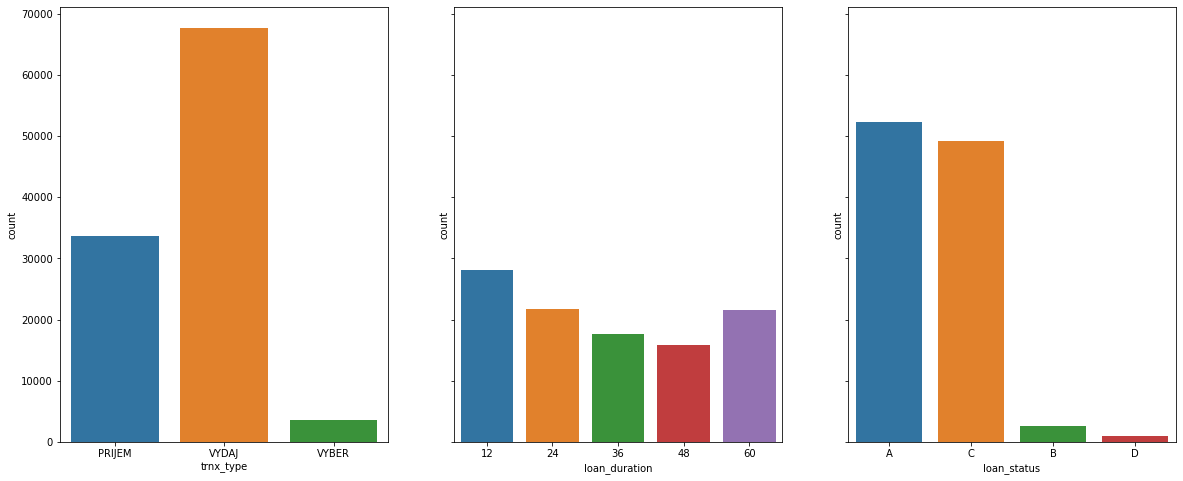

In [53]:
fig, axes = plt.subplots(1,3 , figsize=(20,8), sharey=True)
sns.countplot("trnx_type", data=df, ax=axes[0])
sns.countplot("loan_duration", data=df, ax=axes[1])
sns.countplot("loan_status", data=df, ax=axes[2])

In [54]:
df.loan_status.value_counts()

A    52231
C    49195
B     2526
D      952
Name: loan_status, dtype: int64

1. almost twice as much transactions are debit, than are credit 
2. the top two transactions are 'credit card withdrawals' and 'remittance to other banks'
3. 92.5% of loans are fully paid off at maturity of the contract
4. 92.9% of loans within contract terms have payments up to date

#### Analysis of regional demographics

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='unemployment_96_cat', ylabel='count'>

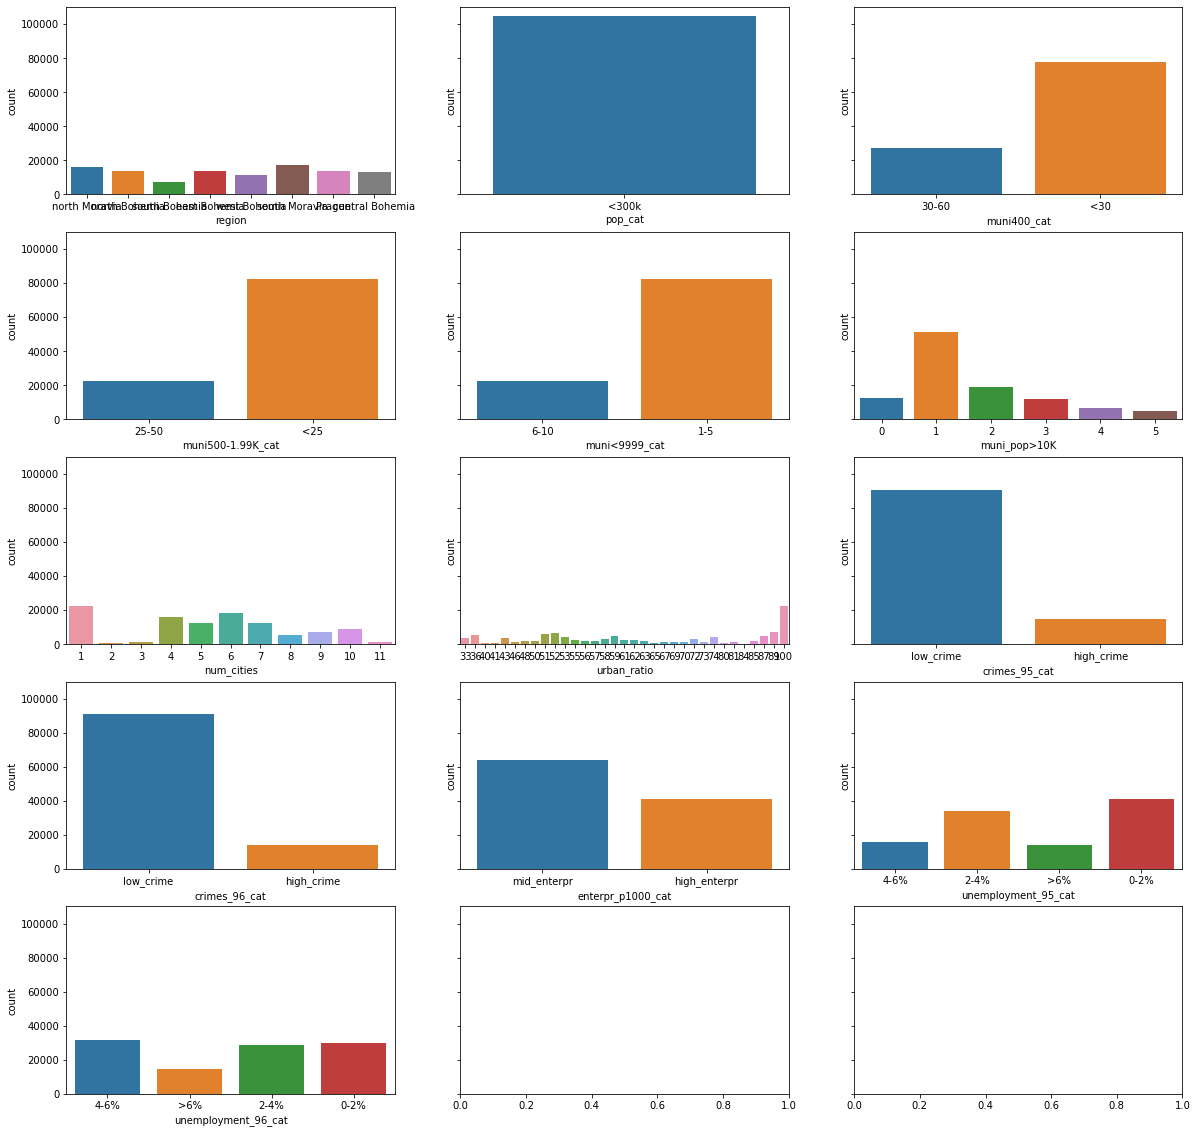

In [55]:
fig, axes = plt.subplots(5,3 , figsize=(20, 20), sharey=True)
sns.countplot("region", data=df, ax=axes[0,0])
sns.countplot("pop_cat", data=df, ax=axes[0,1])
sns.countplot("muni400_cat", data=df, ax=axes[0,2])
sns.countplot("muni500-1.99K_cat", data=df, ax=axes[1,0])
sns.countplot("muni<9999_cat", data=df, ax=axes[1,1])
sns.countplot("muni_pop>10K", data=df, ax=axes[1,2])
sns.countplot("num_cities", data=df, ax=axes[2,0])
sns.countplot("urban_ratio", data=df, ax=axes[2,1])
sns.countplot("crimes_95_cat", data=df, ax=axes[2,2])
sns.countplot("crimes_96_cat", data=df, ax=axes[3,0]) 
sns.countplot("enterpr_p1000_cat", data=df, ax=axes[3,1])
sns.countplot("unemployment_95_cat", data=df, ax=axes[3,2])
sns.countplot("unemployment_96_cat", data=df, ax=axes[4,0])


In [56]:
# check the population per region
b=df[['region', 'population']].groupby('region').mean()
b=b.sort_values('population',ascending=False)
b

,population
region,
Prague,1.204953e+06
north Moravia,2.572230e+05
south Moravia,1.714997e+05
east Bohemia,1.190809e+05
north Bohemia,1.182025e+05
central Bohemia,9.282140e+04
south Bohemia,8.839671e+04
west Bohemia,8.059353e+04


In [57]:
# check the urban ration for each region
d=df[['region', 'urban_ratio']].groupby('region').mean()
d.sort_values('urban_ratio',ascending=False)

,urban_ratio
region,
Prague,100.000000
north Moravia,80.612074
north Bohemia,79.738511
east Bohemia,60.920526
south Bohemia,58.622647
south Moravia,57.086512
west Bohemia,55.690652
central Bohemia,51.293635


1. the vast majority of regions have population size of less than 300,000 except Prague

In [58]:
# check the number of cities in each region
pd.pivot_table(df, columns="pop_cat", index='region', values='num_cities', aggfunc=np.mean)

pop_cat,<300k
region,
Prague,1.000000
central Bohemia,5.951714
east Bohemia,7.265455
north Bohemia,5.697926
north Moravia,4.597284
south Bohemia,5.920137
south Moravia,6.145742
west Bohemia,6.029529


2. Prague is 100% urban city with over 1.2 million population
3. North Moravia is the second largest city with over 226k population in over 5 cities, and an urban ratio of 71%
4. South Moravia is the third largest city with over 179k population in over 5 cities, and an urban ratio of 60%%

In [59]:
#check the crimes per region in 1995 and 1996
e=df[['region', 'crimes_95','crimes_96']].groupby('region').mean()
e=e.sort_values('crimes_95',ascending=False)
e

,crimes_95,crimes_96
region,,
Prague,85677.000000,99107.000000
north Moravia,14499.924264,10951.729759
south Moravia,4905.520078,4967.875103
north Bohemia,4744.689645,4687.981871
central Bohemia,3330.023352,3472.298456
east Bohemia,3163.205702,3095.113155
south Bohemia,2453.062179,2459.257273
west Bohemia,2073.394646,2148.536778


In [60]:
# aggregate the crime-to-population ratio in 1995 and 1996
e['95_crimes_to_population']=e.crimes_95/b.population
e['96_crimes_to_population']=e.crimes_96/b.population
e

,crimes_95,crimes_96,95_crimes_to_population,96_crimes_to_population
region,,,,
Prague,85677.000000,99107.000000,0.071104,0.082250
north Moravia,14499.924264,10951.729759,0.056371,0.042577
south Moravia,4905.520078,4967.875103,0.028604,0.028967
north Bohemia,4744.689645,4687.981871,0.040140,0.039661
central Bohemia,3330.023352,3472.298456,0.035876,0.037408
east Bohemia,3163.205702,3095.113155,0.026564,0.025992
south Bohemia,2453.062179,2459.257273,0.027751,0.027821
west Bohemia,2073.394646,2148.536778,0.025727,0.026659


5. Prague, North Bohemia, and North Moravia have the highest crimes-to-population ratio (7%,4%,and 3.8%, respectively), in 1995
6. In 1996, Prague, North Bohemia, and Central Bohemia had the highest crimes-to-population ratio (7%,4%,and 3.8%, respectively) 

In [61]:
g=df[['region', 'unemployment_rate_95','unemployment_rate_96']].groupby('region').mean()
g

,unemployment_rate_95,unemployment_rate_96
region,,
Prague,0.290000,0.430000
central Bohemia,2.717779,3.135373
east Bohemia,2.840742,3.438834
north Bohemia,5.925571,7.206422
north Moravia,4.956060,6.010189
south Bohemia,2.337665,2.927069
south Moravia,2.620814,3.315416
west Bohemia,1.966109,2.519012


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_sal_cat', ylabel='count'>

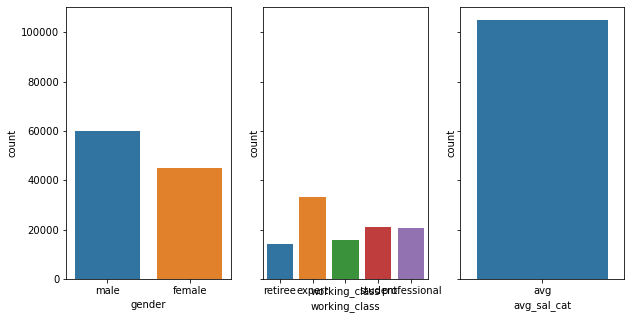

In [62]:
fig, axes = plt.subplots(1,3 , figsize=(10, 5), sharey=True)
sns.countplot("gender", data=df, ax=axes[0])
sns.countplot("working_class", data=df, ax=axes[1])
sns.countplot("avg_sal_cat", data=df, ax=axes[2])

AGGREGATE AND ANALYSE THE PROFILE OF A CLIENT WHO PAYS OFF THEIR LOANS FULLY AT CONTRACT MATURITY

In [63]:
loan_paid=df[df['loan_status']=='A']
loan_default=df[df['loan_status']=='B']
loan_paid

,client_id,account_id,trans_id,district_id,order_id,loan_id,max_trnx_date,statement_freq,acct_open_date,trnx_amount,...,muni<9999_cat,avg_sal_cat,unemployment_95_cat,unemployment_96_cat,enterpr_p1000_cat,crimes_95_cat,crimes_96_cat,gender,age,working_class
0,116,97,29886,74,29563,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
1,116,97,29886,74,29562,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
2,116,97,29886,74,29561,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
3,116,97,29886,74,29560,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
4,116,97,29891,74,29563,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,17928,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104899,12079,9814,3682835,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,295,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104900,12079,9814,3682836,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,398,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104901,12079,9814,3682837,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,439,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104902,12079,9814,3682838,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,445,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class


In [64]:
# find out the number of loans taken by each gender
df[['gender','loan_id']].groupby('gender').count()

,loan_id
gender,
female,44904
male,60000


In [65]:
# check the proportion of fully paid loans by gender
loan_paid[['gender', 'loan_status']].groupby('gender').count()

,loan_status
gender,
female,20630
male,31601


45% of all males and females fully pay off their loans at loan maturity

49.7% of all loans were taken by males. However, 50% of all fully paid loans are by males 

In [66]:
pd.pivot_table(loan_paid, columns='working_class', index='gender', values='loan_status', aggfunc=np.size)

working_class,expert,professional,retiree,student,working_class
gender,,,,,
female,4975,2712,4708,3516,4719
male,5929,8751,4957,5252,6712


In [67]:
loan_paid[['gender', 'age','trnx_amount','order_amount','balance','avg_sal','loan_amount','loan_payments','loan_duration']].groupby('gender').mean()

,age,trnx_amount,order_amount,balance,avg_sal,loan_amount,loan_payments,loan_duration
gender,,,,,,,,
female,38.665196,8702.031508,4334.549336,52664.415414,9898.629859,80065.55366,4176.570480,18.893456
male,37.028480,9005.624474,4314.552343,54694.971140,9433.589570,107281.58995,4754.643714,24.254802


A typical client who would fully pay off their loans could be a:
female, 40, who is likely an expert in her career, with an avg salary of $9801 and average trnx amount of $6864
male, 39, who is also likely a career expert, with an avg salary of $9651 and average trnx amount of $7776

AGGREGATE AND ANALYSE THE PROFILE OF A CLIENT WHO DEFAULTS ON THEIR LOANS AT CONTRACT MATURITY

In [68]:
loan_default[['gender', 'loan_status']].groupby('gender').count()

,loan_status
gender,
female,2120
male,406


In [69]:
pd.pivot_table(loan_default, columns='working_class', index='gender', values='loan_status', aggfunc=np.size)

working_class,expert,student
gender,,
female,NaN,2120.0
male,406.0,NaN


In [70]:
loan_default[['gender', 'age','trnx_amount','order_amount','balance','avg_sal','loan_amount','loan_payments','loan_duration']].groupby('gender').mean()

,age,trnx_amount,order_amount,balance,avg_sal,loan_amount,loan_payments,loan_duration
gender,,,,,,,,
female,20.0,8186.158491,4619.575,30541.558491,9675,174744,7281.0,24.0
male,47.0,9284.206897,4335.800,45510.815271,9897,208128,4336.0,48.0


69% of all loan defaults at maturity were from females, and 31% from males

A typical client who would default on their loan is a:
female, 41, who is likely an expert in her career, with an avg salary of $9078 and average trnx amount of $8501
male, 40, who is also likely a career expert, with an avg salary of $9759 and average trnx amount of $7750

In [71]:
loan_paid.columns

Index(['client_id', 'account_id', 'trans_id', 'district_id', 'order_id',
       'loan_id', 'max_trnx_date', 'statement_freq', 'acct_open_date',
       'trnx_amount', 'balance', 'trnx_date', 'trnx_type', 'account_to',
       'order_amount', 'bank_to', 'order_ksymbol', 'loan_amount', 'loan_date',
       'loan_duration', 'loan_payments', 'loan_status', 'dist_code',
       'dist_name', 'region', 'population', 'muni_pop<400',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'avg_sal', 'unemployment_rate_95',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'crimes_96',
       'disp_id', 'disp_type', 'birthday', 'card_id', 'card_type',
       'card_issued', 'pop_cat', 'muni400_cat', 'muni500-1.99K_cat',
       'muni<9999_cat', 'avg_sal_cat', 'unemployment_95_cat',
       'unemployment_96_cat', 'enterpr_p1000_cat', 'crimes_95_cat',
       'crimes_96_cat', 'gender', 'age', 'working_class'],
      dtype='object')

ANALYSE AND AGGREGATE CLIENTS WHO WERE ISSUES CREDIT CARDS

In [72]:
df.card_type.fillna('None', inplace=True)

In [73]:
clients_with_cards=df[df['card_type']!='None']
gd_loans_cards_cl= loan_paid[df['card_type']!='None']
gd_loans_cards_cl

<ipython-input-73-12a63851bada>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gd_loans_cards_cl= loan_paid[df['card_type']!='None']


,client_id,account_id,trans_id,district_id,order_id,loan_id,max_trnx_date,statement_freq,acct_open_date,trnx_amount,...,muni<9999_cat,avg_sal_cat,unemployment_95_cat,unemployment_96_cat,enterpr_p1000_cat,crimes_95_cat,crimes_96_cat,gender,age,working_class
0,116,97,29886,74,29563,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
1,116,97,29886,74,29562,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
2,116,97,29886,74,29561,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
3,116,97,29886,74,29560,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,900,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
4,116,97,29891,74,29563,4986,1998-12-31,POPLATEK MESICNE,1996-05-05,17928,...,6-10,avg,4-6%,4-6%,mid_enterpr,low_crime,low_crime,male,56,retiree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104899,12079,9814,3682835,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,295,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104900,12079,9814,3682836,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,398,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104901,12079,9814,3682837,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,439,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class
104902,12079,9814,3682838,64,43945,6995,1998-12-31,POPLATEK TYDNE,1995-01-19,445,...,1-5,avg,0-2%,2-4%,high_enterpr,low_crime,low_crime,female,26,working_class


In [74]:
df.card_type.value_counts()

classic    78787
junior     17858
gold        8259
Name: card_type, dtype: int64

## Feature Engineering

### Correlation and Multicorrelation

In [75]:
df.shape

(104904, 57)

In [76]:
# to be dropped after analysis
district_cat_features=["pop_cat","muni400_cat","muni500-1.99K_cat","muni<9999_cat","avg_sal_cat",
                       "unemployment_95_cat","unemployment_96_cat","enterpr_p1000_cat","crimes_95_cat","crimes_96_cat"]
date_columns =['acct_open_date', 'trnx_date','max_trnx_date', 'loan_date', 'birthday','card_issued']
id_columns=['account_id','trans_id','district_id','order_id','loan_id','dist_code','disp_id','card_id']
other_columns=['account_to','bank_to', 'statement_freq']

In [77]:
df2=df.copy()
df2.drop(["pop_cat","muni400_cat","muni500-1.99K_cat","muni<9999_cat","avg_sal_cat",
                       "unemployment_95_cat","unemployment_96_cat","enterpr_p1000_cat","crimes_95_cat","crimes_96_cat"], axis=1, inplace=True)

In [78]:
df2.drop(['acct_open_date', 'trnx_date','max_trnx_date', 'loan_date', 'birthday','card_issued'], axis=1, inplace=True)

In [79]:
df2.drop(['account_id','trans_id','district_id','order_id','loan_id','dist_code','disp_id','card_id'], axis=1, inplace=True)

In [80]:
df2.drop(['account_to','bank_to', 'statement_freq'], axis=1, inplace=True)

In [81]:
df2.shape

(104904, 30)

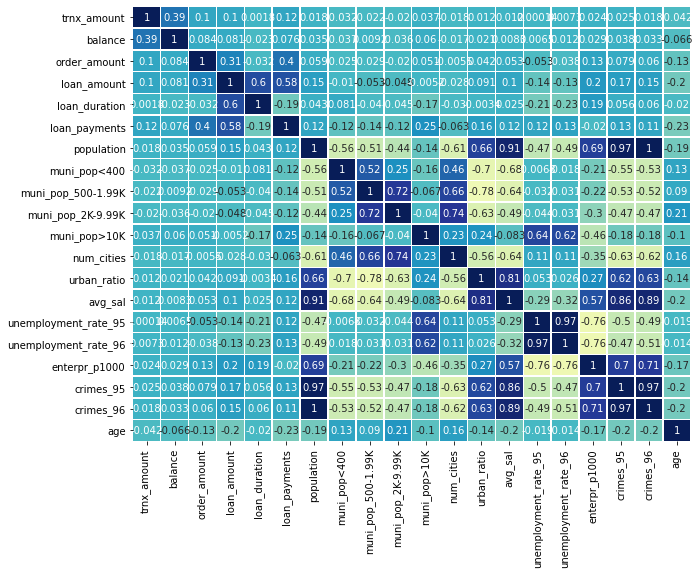

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [83]:
mycorr=df2.corr()
mycorr.columns

Index(['trnx_amount', 'balance', 'order_amount', 'loan_amount',
       'loan_duration', 'loan_payments', 'population', 'muni_pop<400',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'avg_sal', 'unemployment_rate_95',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'crimes_96',
       'age'],
      dtype='object')

there is high negative and positive correlation between a lot of the features
using VIF we will decide on the columns to drop

In [84]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df2, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df2[X], df2[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [85]:
calculate_vif(df2, mycorr.columns)

,VIF,Tolerance
trnx_amount,1.201254,0.832464
balance,1.216542,0.822002
order_amount,1.274746,0.784470
loan_amount,8.825441,0.113309
loan_duration,5.541206,0.180466
loan_payments,5.988654,0.166982
population,431.061875,0.002320
muni_pop<400,3.154760,0.316981
muni_pop_500-1.99K,4.987279,0.200510
muni_pop_2K-9.99K,8.904894,0.112298


In [86]:
# first drop 'crime_95' and then 'crime_96' to observe the which column reduces VIF the most
calculate_vif(df2,['trnx_amount', 'balance', 'order_amount', 'loan_amount',
       'loan_duration', 'loan_payments', 'population', 'muni_pop<400',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'avg_sal', 'unemployment_rate_95',
       'unemployment_rate_96', 'enterpr_p1000', #'crimes_96',
                   'age', 'crimes_95'
                  ])

,VIF,Tolerance
trnx_amount,1.201236,0.832476
balance,1.214728,0.823230
order_amount,1.274304,0.784742
loan_amount,8.130754,0.122990
loan_duration,5.322868,0.187869
loan_payments,5.437514,0.183908
population,83.908213,0.011918
muni_pop<400,3.114665,0.321062
muni_pop_500-1.99K,3.986018,0.250877
muni_pop_2K-9.99K,6.085801,0.164317


In [87]:
# next drop 'population' to observe the impact
calculate_vif(df2,['trnx_amount', 'balance', 'order_amount', 'loan_amount',
       'loan_duration', 'loan_payments', 'muni_pop<400', 'age',#'crimes_96',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'avg_sal', 'unemployment_rate_95','unemployment_rate_96', 'enterpr_p1000',
        'crimes_95', #'population'
                  ])

,VIF,Tolerance
trnx_amount,1.201236,0.832476
balance,1.213102,0.824333
order_amount,1.265725,0.790061
loan_amount,8.126952,0.123047
loan_duration,5.301347,0.188631
loan_payments,5.434174,0.184021
muni_pop<400,3.023882,0.330701
age,1.203966,0.830588
muni_pop_500-1.99K,3.783189,0.264327
muni_pop_2K-9.99K,5.454143,0.183347


In [88]:
# we then drop 'unemployment_rate_95' and 'unemployment_rate_96' alternatively
calculate_vif(df2,['trnx_amount', 'balance', 'order_amount', 'loan_amount',
       'loan_duration', 'loan_payments', 'muni_pop<400', 'crimes_95','age',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'avg_sal','unemployment_rate_96', 'enterpr_p1000',
        #'crimes_96', #'population', 'unemployment_rate_95'
                  ])

,VIF,Tolerance
trnx_amount,1.200847,0.832746
balance,1.213075,0.824351
order_amount,1.261690,0.792588
loan_amount,8.087089,0.123654
loan_duration,5.285363,0.189202
loan_payments,5.408051,0.184909
muni_pop<400,2.961847,0.337627
crimes_95,6.371731,0.156943
age,1.203758,0.830732
muni_pop_500-1.99K,3.736276,0.267646


In [89]:
#drop avg_sal and loan_amount
calculate_vif(df2,['trnx_amount', 'balance', 'order_amount',
       'loan_duration', 'loan_payments', 'muni_pop<400', 'crimes_95','age',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio','unemployment_rate_96', 'enterpr_p1000',
        #'crimes_96', 'population', 'unemployment_rate_95','avg_sal','loan_amount'
                  ])

,VIF,Tolerance
trnx_amount,1.200665,0.832872
balance,1.199434,0.833727
order_amount,1.248062,0.801243
loan_duration,1.118740,0.893863
loan_payments,1.409964,0.709238
muni_pop<400,2.932717,0.340981
crimes_95,4.532187,0.220644
age,1.178840,0.848291
muni_pop_500-1.99K,3.625238,0.275844
muni_pop_2K-9.99K,4.742145,0.210875


In [90]:
#now we can drop all the columns from df2
df2.drop(['crimes_96', 'population', 'unemployment_rate_95','avg_sal','loan_amount'], axis=1,inplace=True)

### Feature Transformation

Detect Outliers and Treat

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trnx_amount'>

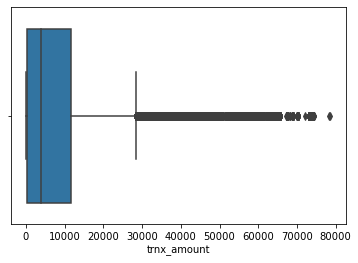

In [92]:
sns.boxplot('trnx_amount',data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

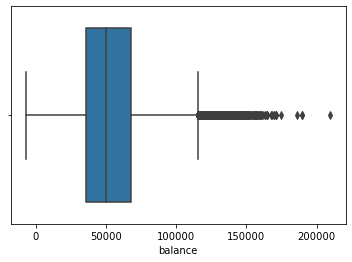

In [93]:
sns.boxplot('balance',data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_amount'>

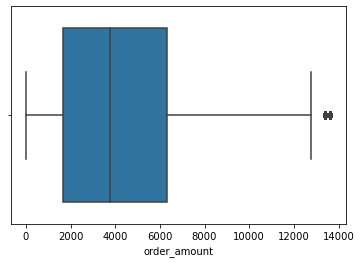

In [94]:
sns.boxplot('order_amount',data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='crimes_95'>

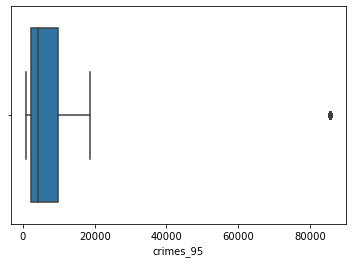

In [95]:
sns.boxplot('crimes_95',data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='muni_pop_2K-9.99K'>

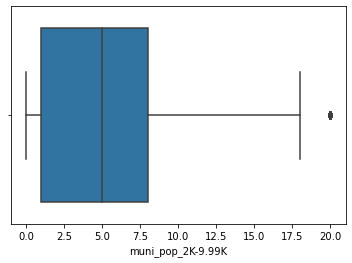

In [96]:
sns.boxplot('muni_pop_2K-9.99K',data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='muni_pop>10K'>

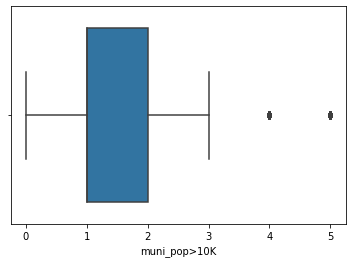

In [97]:
sns.boxplot('muni_pop>10K',data=df2)

In [91]:
df2.columns

Index(['client_id', 'trnx_amount', 'balance', 'trnx_type', 'order_amount',
       'order_ksymbol', 'loan_duration', 'loan_payments', 'loan_status',
       'dist_name', 'region', 'muni_pop<400', 'muni_pop_500-1.99K',
       'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities', 'urban_ratio',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'disp_type',
       'card_type', 'gender', 'age', 'working_class'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

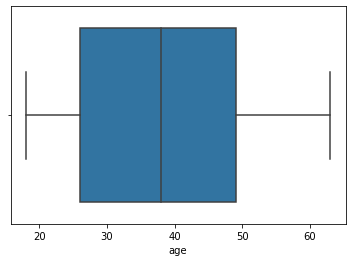

In [110]:
sns.boxplot('age',data=df2)

In [111]:
outlier_cols=df2[['trnx_amount','balance','order_amount','crimes_95','muni_pop_2K-9.99K','muni_pop>10K','crimes_95'
                 #'unemployment_rate_96''muni_pop<400',
                 ]]
outlier_cols=outlier_cols.columns

In [112]:
col_names=list(outlier_cols)
display(col_names)
for i in col_names:
    q1, q2, q3 = df2[i].quantile([0.25,0.5,0.75])
    IQR = q3-q1
    lower_cap=q1-(1.5*IQR)
    upper_cap=q3+(1.5*IQR)
    df2[i]=df2[i].apply(lambda x: upper_cap if x>upper_cap else lower_cap if x<lower_cap else x)

['trnx_amount',
 'balance',
 'order_amount',
 'crimes_95',
 'muni_pop_2K-9.99K',
 'muni_pop>10K',
 'crimes_95']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trnx_amount'>

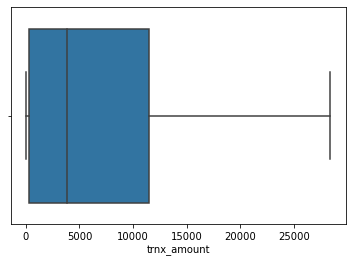

In [113]:
sns.boxplot('trnx_amount',data=df2)

check and Transform skewed features

array([[<AxesSubplot:title={'center':'trnx_amount'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'order_amount'}>,
        <AxesSubplot:title={'center':'loan_duration'}>],
       [<AxesSubplot:title={'center':'loan_payments'}>,
        <AxesSubplot:title={'center':'muni_pop<400'}>,
        <AxesSubplot:title={'center':'muni_pop_500-1.99K'}>,
        <AxesSubplot:title={'center':'muni_pop_2K-9.99K'}>],
       [<AxesSubplot:title={'center':'muni_pop>10K'}>,
        <AxesSubplot:title={'center':'num_cities'}>,
        <AxesSubplot:title={'center':'urban_ratio'}>,
        <AxesSubplot:title={'center':'unemployment_rate_96'}>],
       [<AxesSubplot:title={'center':'enterpr_p1000'}>,
        <AxesSubplot:title={'center':'crimes_95'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

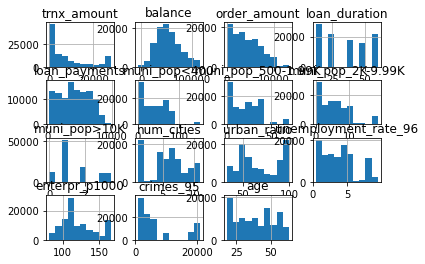

In [114]:
df2.hist()

In [115]:
df2.skew()

client_id              -0.060707
trnx_amount             1.178031
balance                 0.473299
order_amount            0.473794
loan_duration           0.194598
loan_payments           0.090140
muni_pop<400            0.589950
muni_pop_500-1.99K      0.636808
muni_pop_2K-9.99K       0.926042
muni_pop>10K            0.547252
num_cities             -0.038565
urban_ratio             0.178211
unemployment_rate_96    0.457760
enterpr_p1000           0.588401
crimes_95               1.195602
age                     0.056813
dtype: float64

In [116]:
skew=df2.skew()
skew=skew[abs(skew)>0.5].index
df2[skew]=np.sqrt(df[skew])
df2.skew()

client_id              -0.060707
trnx_amount             0.824208
balance                 0.473299
order_amount            0.473794
loan_duration           0.194598
loan_payments           0.090140
muni_pop<400           -0.406865
muni_pop_500-1.99K     -0.426701
muni_pop_2K-9.99K      -0.275328
muni_pop>10K           -0.365962
num_cities             -0.038565
urban_ratio             0.178211
unemployment_rate_96    0.457760
enterpr_p1000           0.426052
crimes_95               1.747535
age                     0.056813
dtype: float64

### Feature Encoding and Standardization

In [117]:
df2.columns

Index(['client_id', 'trnx_amount', 'balance', 'trnx_type', 'order_amount',
       'order_ksymbol', 'loan_duration', 'loan_payments', 'loan_status',
       'dist_name', 'region', 'muni_pop<400', 'muni_pop_500-1.99K',
       'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities', 'urban_ratio',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'disp_type',
       'card_type', 'gender', 'age', 'working_class'],
      dtype='object')

In [118]:
onehot_feat=['order_ksymbol','region','disp_type','card_type','gender','working_class']

In [119]:
df2.drop(['dist_name','trnx_type'], axis=1, inplace=True)

Feature Encoding

In [120]:
#encode all non_ordinal features
onehot_feat_encode=pd.get_dummies(df2, columns=onehot_feat, drop_first=True)
onehot_feat_encode.columns

Index(['client_id', 'trnx_amount', 'balance', 'order_amount', 'loan_duration',
       'loan_payments', 'loan_status', 'muni_pop<400', 'muni_pop_500-1.99K',
       'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities', 'urban_ratio',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'age',
       'order_ksymbol_POJISTNE', 'order_ksymbol_SIPO', 'order_ksymbol_UVER',
       'region_central Bohemia', 'region_east Bohemia', 'region_north Bohemia',
       'region_north Moravia', 'region_south Bohemia', 'region_south Moravia',
       'region_west Bohemia', 'card_type_gold', 'card_type_junior',
       'gender_male', 'working_class_professional', 'working_class_retiree',
       'working_class_student', 'working_class_working_class'],
      dtype='object')

In [121]:
onehot_feat_encode.shape

(104904, 34)

In [122]:
# loan_status is the only ordinal variable and should be encoded
loan_status_map= {
    'A':'4',
    'C':'3',
    'D':'2',
    'B':'1'}
onehot_feat_encode['loan_status']=onehot_feat_encode['loan_status'].map(loan_status_map)
onehot_feat_encode['loan_status']

0         4
1         4
2         4
3         4
4         4
         ..
104899    4
104900    4
104901    4
104902    4
104903    4
Name: loan_status, Length: 104904, dtype: object

In [123]:
onehot_feat_encode.columns

Index(['client_id', 'trnx_amount', 'balance', 'order_amount', 'loan_duration',
       'loan_payments', 'loan_status', 'muni_pop<400', 'muni_pop_500-1.99K',
       'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities', 'urban_ratio',
       'unemployment_rate_96', 'enterpr_p1000', 'crimes_95', 'age',
       'order_ksymbol_POJISTNE', 'order_ksymbol_SIPO', 'order_ksymbol_UVER',
       'region_central Bohemia', 'region_east Bohemia', 'region_north Bohemia',
       'region_north Moravia', 'region_south Bohemia', 'region_south Moravia',
       'region_west Bohemia', 'card_type_gold', 'card_type_junior',
       'gender_male', 'working_class_professional', 'working_class_retiree',
       'working_class_student', 'working_class_working_class'],
      dtype='object')

Feature Standardization

first condense the dataset to ensure one observation per client_id
using 'groupby()' we can aggregate both numeric and categorical variables

In [124]:
grp_numeric=onehot_feat_encode[['client_id','trnx_amount','balance','order_amount','loan_duration','loan_payments','muni_pop<400',
       'muni_pop_500-1.99K', 'muni_pop_2K-9.99K', 'muni_pop>10K', 'num_cities',
       'urban_ratio', 'unemployment_rate_96', 'enterpr_p1000', 'crimes_95','age']].groupby('client_id').mean()
grp_numeric.shape

(170, 15)

In [126]:
grp_categorical=onehot_feat_encode[['client_id','loan_status', 'order_ksymbol_POJISTNE','order_ksymbol_SIPO',
                  'order_ksymbol_UVER', 'region_central Bohemia','region_east Bohemia', 'region_north Bohemia',
                 'region_north Moravia','region_south Bohemia', 'region_south Moravia', 'region_west Bohemia',
                'card_type_gold','card_type_junior', 'gender_male', 
                  'working_class_professional','working_class_retiree', 'working_class_student',
                  'working_class_working_class']].groupby('client_id').max()
grp_categorical.shape

(170, 18)

In [127]:
# concatenate both num and categ dataframe to reconstitute the newly formed consdensed dataset
df4=pd.concat([grp_numeric, grp_categorical], axis=1)
df4

,trnx_amount,balance,order_amount,loan_duration,loan_payments,muni_pop<400,muni_pop_500-1.99K,muni_pop_2K-9.99K,muni_pop>10K,num_cities,...,region_south Bohemia,region_south Moravia,region_west Bohemia,card_type_gold,card_type_junior,gender_male,working_class_professional,working_class_retiree,working_class_student,working_class_working_class
client_id,,,,,,,,,,,,,,,,,,,,,
10040,91.175567,67800.306760,7399.900,24,6495,8.426150,5.099020,2.449490,1.414214,9,...,0,0,0,0,0,0,0,0,0,1
10043,66.198280,39671.731235,4130.000,36,2076,9.219544,4.358899,2.449490,1.000000,5,...,0,0,0,0,0,1,1,0,0,0
10095,92.108245,56794.026005,6695.000,12,6695,5.916080,6.000000,3.000000,0.000000,7,...,0,0,0,0,1,0,0,0,1,0
10198,94.017289,67685.356471,6239.200,36,6239,5.830952,3.464102,1.732051,1.000000,4,...,0,0,1,0,1,1,0,0,1,0
1020,89.420068,65205.346070,7795.500,24,7796,5.656854,7.071068,2.645751,2.000000,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,75.776596,63712.722222,3563.000,36,3563,5.385165,4.358899,2.828427,1.000000,9,...,0,0,0,0,0,1,0,1,0,0
992,59.779413,33872.027523,6829.000,12,4423,7.071068,3.316625,1.732051,1.000000,4,...,1,0,0,0,0,1,0,0,0,0
9929,68.817101,55829.267857,3354.500,24,1494,9.110434,5.099020,2.236068,1.000000,6,...,0,0,0,0,0,0,1,0,0,0


we are now ready for standardize our dataset using MinMaxScaler

In [128]:
df3=df4.copy()

In [129]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for col in df3.columns:
    df3[col]=ms.fit_transform(df3[[col]])

df3

,trnx_amount,balance,order_amount,loan_duration,loan_payments,muni_pop<400,muni_pop_500-1.99K,muni_pop_2K-9.99K,muni_pop>10K,num_cities,...,region_south Bohemia,region_south Moravia,region_west Bohemia,card_type_gold,card_type_junior,gender_male,working_class_professional,working_class_retiree,working_class_student,working_class_working_class
client_id,,,,,,,,,,,,,,,,,,,,,
10040,0.694486,0.825594,0.760851,0.25,0.644197,0.685710,0.609449,0.547723,0.632456,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10043,0.327664,0.230870,0.409844,0.50,0.183788,0.750276,0.520988,0.547723,0.447214,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10095,0.708183,0.592887,0.685184,0.00,0.665034,0.481444,0.717137,0.670820,0.000000,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10198,0.736220,0.823164,0.636256,0.50,0.617524,0.474516,0.414039,0.387298,0.447214,0.3,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1020,0.668704,0.770729,0.803317,0.25,0.779746,0.460348,0.845154,0.591608,0.894427,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.468333,0.739170,0.348979,0.50,0.338716,0.438238,0.520988,0.632456,0.447214,0.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
992,0.233396,0.108246,0.699568,0.00,0.428318,0.575435,0.396412,0.387298,0.447214,0.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9929,0.366125,0.572489,0.326597,0.25,0.123151,0.741397,0.609449,0.500000,0.447214,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [131]:
sse = []
cluster= []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0) 
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)
    cluster.append(kmeans)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


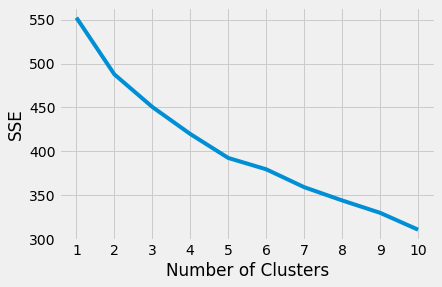

In [132]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [133]:
from kneed import KneeLocator

In [134]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

5

In [135]:
for i in range(1,10):
    
    print("---------------------------------------")
    print(cluster[i])
    print("Silhouette score:",silhouette_score(df3, cluster[i].predict(df3)))

---------------------------------------
KMeans(n_clusters=2, random_state=0)
Silhouette score: 0.13498212212175614
---------------------------------------
KMeans(n_clusters=3, random_state=0)
Silhouette score: 0.10330131392077642
---------------------------------------
KMeans(n_clusters=4, random_state=0)
Silhouette score: 0.1088623906796024
---------------------------------------
KMeans(n_clusters=5, random_state=0)
Silhouette score: 0.12387806928036499
---------------------------------------
KMeans(n_clusters=6, random_state=0)
Silhouette score: 0.10446336798481447
---------------------------------------
KMeans(n_clusters=7, random_state=0)
Silhouette score: 0.12803999112163647
---------------------------------------
KMeans(random_state=0)
Silhouette score: 0.13794512288044503
---------------------------------------
KMeans(n_clusters=9, random_state=0)
Silhouette score: 0.13915325118429875
---------------------------------------
KMeans(n_clusters=10, random_state=0)
Silhouette score:

In [136]:
k_means= KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
y=k_means.fit_predict(df3)
y

array([1, 1, 0, 0, 2, 3, 1, 4, 4, 1, 1, 1, 4, 4, 3, 4, 3, 1, 2, 2, 0, 4,
       4, 1, 4, 1, 0, 3, 2, 4, 4, 2, 1, 4, 4, 3, 1, 1, 2, 4, 4, 0, 2, 0,
       3, 1, 1, 1, 4, 3, 2, 4, 2, 3, 0, 1, 4, 4, 2, 2, 1, 1, 4, 3, 3, 1,
       4, 2, 2, 2, 3, 1, 1, 4, 1, 2, 4, 4, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 1, 3, 1, 3, 3, 4, 2, 1, 2, 1, 4, 4, 0, 2, 1, 1, 3, 2,
       4, 3, 0, 4, 4, 3, 3, 2, 3, 1, 3, 1, 4, 0, 1, 1, 4, 0, 3, 1, 1, 4,
       0, 2, 1, 1, 4, 3, 2, 0, 4, 2, 3, 1, 3, 1, 0, 4, 1, 4, 0, 3, 2, 4,
       0, 3, 4, 4, 1, 2, 4, 4, 1, 1, 1, 4, 1, 1, 1, 3])

In [137]:
print(f" The lowest SSE value is: {k_means.inertia_}")
print(f" The final locations of the centroids are: {k_means.cluster_centers_[:1]}")
print(f" The number of iterations to converse is: {k_means.n_iter_}")
print(f" Cluster Labels: {k_means.labels_[:5]}")

 The lowest SSE value is: 392.3879653361017
 The final locations of the centroids are: [[ 5.85613563e-01  5.69348752e-01  5.68770481e-01  5.97222222e-01
   5.76132759e-01  4.78728490e-01  5.46231382e-01  4.75109448e-01
   5.56704202e-01  4.94444444e-01  4.30348259e-01  4.34596804e-01
   4.32950043e-01  1.80920899e-01  5.06172840e-02  7.22222222e-01
   1.11111111e-01  7.22222222e-01  0.00000000e+00  3.33333333e-01
   1.66666667e-01  1.11111111e-01  2.22222222e-01  5.55555556e-02
   0.00000000e+00  1.11111111e-01 -2.77555756e-17  8.33333333e-01
   5.00000000e-01 -5.55111512e-17  0.00000000e+00  1.00000000e+00
   5.55111512e-17]]
 The number of iterations to converse is: 11
 Cluster Labels: [1 1 0 0 2]


In [139]:
df4=df4.reset_index()
df4['cluster_group']=y
df4

,client_id,trnx_amount,balance,order_amount,loan_duration,loan_payments,muni_pop<400,muni_pop_500-1.99K,muni_pop_2K-9.99K,muni_pop>10K,...,region_south Moravia,region_west Bohemia,card_type_gold,card_type_junior,gender_male,working_class_professional,working_class_retiree,working_class_student,working_class_working_class,cluster_group
0,10040,91.175567,67800.306760,7399.900,24,6495,8.426150,5.099020,2.449490,1.414214,...,0,0,0,0,0,0,0,0,1,1
1,10043,66.198280,39671.731235,4130.000,36,2076,9.219544,4.358899,2.449490,1.000000,...,0,0,0,0,1,1,0,0,0,1
2,10095,92.108245,56794.026005,6695.000,12,6695,5.916080,6.000000,3.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
3,10198,94.017289,67685.356471,6239.200,36,6239,5.830952,3.464102,1.732051,1.000000,...,0,1,0,1,1,0,0,1,0,0
4,1020,89.420068,65205.346070,7795.500,24,7796,5.656854,7.071068,2.645751,2.000000,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,9914,75.776596,63712.722222,3563.000,36,3563,5.385165,4.358899,2.828427,1.000000,...,0,0,0,0,1,0,1,0,0,4
166,992,59.779413,33872.027523,6829.000,12,4423,7.071068,3.316625,1.732051,1.000000,...,0,0,0,0,1,0,0,0,0,1
167,9929,68.817101,55829.267857,3354.500,24,1494,9.110434,5.099020,2.236068,1.000000,...,0,0,0,0,0,1,0,0,0,1
168,9930,60.675794,49502.537197,2203.875,24,3900,7.810250,4.795832,2.000000,1.414214,...,0,0,0,0,1,0,0,0,1,1


In [140]:
X=df3.values

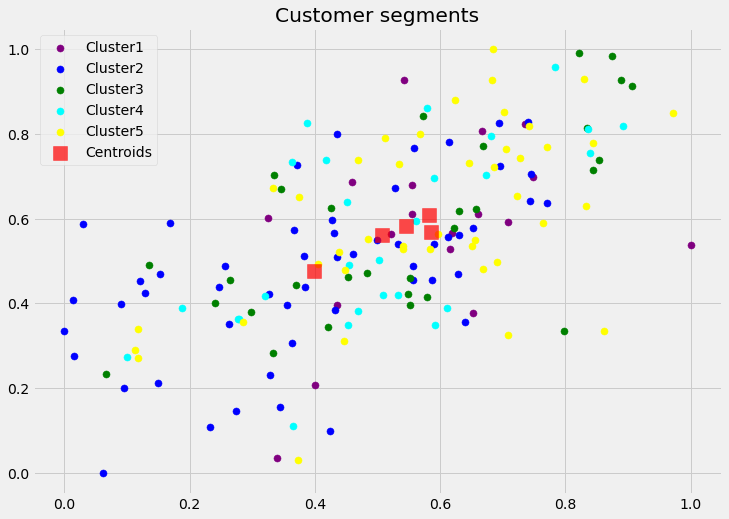

In [149]:
plt.figure(figsize=(11,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y==1,0],X[y==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y==2,0],X[y==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y==3,0],X[y==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y==4,0],X[y==4,1],s=50, c='yellow',label='Cluster5')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
#plt.xlabel('Cluster Group')
#plt.ylabel('Relative Ranking')
plt.legend()
plt.show()

In [143]:
cluster_0=df4[df4['cluster_group']==0]
cluster_1=df4[df4['cluster_group']==1]
cluster_2=df4[df4['cluster_group']==2]
cluster_3=df4[df4['cluster_group']==3]
cluster_4=df4[df4['cluster_group']==4]


In [144]:
cluster_4.loan_status.value_counts()

3    28
4    13
2     1
Name: loan_status, dtype: int64